start


<IPython.core.display.Javascript object>


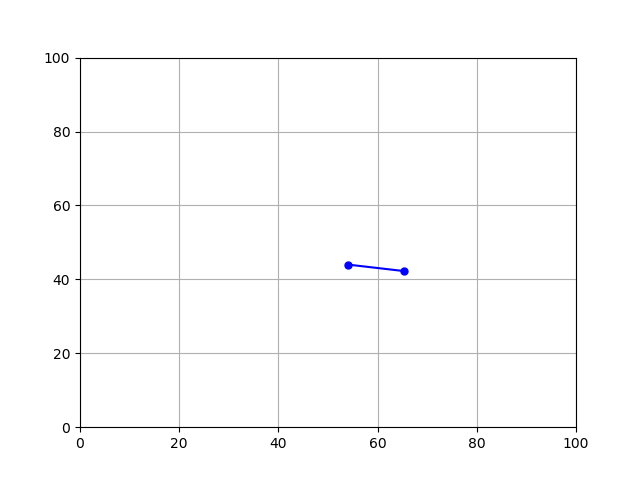

showing figure
this will never happen as long as you have the figure 
finished


In [6]:
# -*- coding: utf-8 -*-
# %matplotlib
# from IPython.core.debugger import set_trace
# import matplotlib
# matplotlib.use("Qt5Agg")
%matplotlib notebook

import math
import matplotlib.pyplot as plt
from matplotlib.backend_bases import MouseEvent

class DraggablePlotExample(object):

    
    def __init__(self):
        self._figure, self._axes= None, None
        self._dragging_point = None
        self._segments = []
        self.num_called = 0
        
        self._lines = [None, None, None]
        self._init_plot()
        
    def _init_plot(self):
        self._figure = plt.figure("Plot Number " + str(1))
        axes = plt.axes()
        axes.set_xlim(0, 100)
        axes.set_ylim(0, 100)
        axes.grid(which="both")
        self._axes = axes
        self._figure.canvas.mpl_connect('button_press_event', self._on_click)
        self._figure.canvas.mpl_connect('button_release_event', self._on_release)
        self._figure.canvas.mpl_connect('motion_notify_event', self._on_motion)
        print("showing figure")
        plt.show()
        print("this will never happen as long as you have the figure ")
        
    def _update_plot(self):
        if not self._segments:
            for i in range(0, 3):
                if self._lines[i]:
                    self._lines[i].set_data([0], [0])
                    self._lines[i].set_alpha(0.0)
            self._figure.canvas.draw()
            return
        
        for num,segment in enumerate(self._segments):
            x = []
            y = []
            for pair in segment:
                x.append(pair[0])
                y.append(pair[1])
               
            if not self._lines[num]:
                self._lines[num], = self._axes.plot(x, y, "b", marker="o", markersize=5)
        
            # Update current plot
            else:
                self._lines[num].set_data(x, y)
                self._lines[num].set_alpha(1.0)
                
        
        
        for i in range(num+1, 3):
            if self._lines[i]:
                self._lines[i].set_data([0], [0])
                self._lines[i].set_alpha(0.0)
            
        self._figure.canvas.draw()
            
    def _add_point(self, x, y=None):
        if isinstance(x, MouseEvent):
            x, y = int(x.xdata), int(x.ydata)
            if not self._segments:
                self._segments.append([(x,y)])
                return x, y
            for segment in self._segments:
                if len(segment) < 2:
                    segment.append((x,y))
                    return x, y
            if len(self._segments) < 3:
                self._segments.append([(x,y)])
        return x, y
    
    def _remove_segment(self, segnum):
#         print ("will remove point", segnum)
        del self._segments[segnum]
#         for segment in self._segments:
#             for pair in segment:
#                 if x == pair[0] and y == pair[1]:
#                     self._segments.remove(segment)
                
    def _replace_point(self, segindex, index, xnew, ynew):
        self._segments[segindex][index] = (xnew,ynew)
            
            
    def _find_neighbor_point(self, event):
# Find point around mouse position
# :rtype: ((int, int)|None)
# :return: (x, y) if there are any point around mouse else None
        distance_threshold = 3.0
        nearest_point = None
        min_distance = math.sqrt(2 * (100 ** 2))
        for snum,segment in enumerate(self._segments):
            for pnum,pair in enumerate(segment):
                
                distance = math.hypot(event.xdata - pair[0], event.ydata - pair[1])
                
                if distance < min_distance:
                    min_distance = distance
                    nearest_point = (snum, pnum)
                if min_distance < distance_threshold:
                    return nearest_point
        return None
    
    def _on_click(self, event):
# callback method for mouse click event
# :type event: MouseEvent

#         print("click")
        
        # left click
#         set_trace()
        if event.button == 1 and event.inaxes in [self._axes]:
            point = self._find_neighbor_point(event)
            if point:
                self._dragging_point = (point[0], point[1])
                self._replace_point(point[0], point[1], event.xdata, event.ydata)
            else:
                self._add_point(event)
                self._update_plot()
                # right click
        elif event.button == 3 and event.inaxes in [self._axes]:
#             print("should remove")
            point = self._find_neighbor_point(event)
            if point:
                self._remove_segment(point[0])
                self._update_plot()
                
    def _on_release(self, event):
#         print("release")
# callback method for mouse release event
# :type event: MouseEvent

        if event.button == 1 and event.inaxes in [self._axes] and self._dragging_point:
            self._replace_point(self._dragging_point[0], self._dragging_point[1], event.xdata, event.ydata)
            self._dragging_point = None
            self._update_plot()
    
    
    
    def _on_motion(self, event):
# callback method for mouse motion event
# :type event: MouseEvent
        self.num_called += 1
        if self.num_called % 10:
            return
        if not self._dragging_point:
            return
#         print("dragging")
        self._replace_point(self._dragging_point[0], self._dragging_point[1], event.xdata, event.ydata)
        self._update_plot()
        
if __name__ == "__main__":
    print("start")
    plot = DraggablePlotExample()
    
print("finished")